<a href="https://colab.research.google.com/github/simbrizzy/Brizzy101/blob/master/Motor_Insurance_Risk_Scoring_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT OVERVIEW: PREDICTING RISK SCORES FOR INSURANCE CLAIMS
This project aimed to develop a machine learning model to assign risk scores to policyholders, helping the insurance company identify individuals with a higher likelihood of making claims. By analyzing historical data on policyholder attributes and claims, the goal was to build a reliable model that supports decision-making, such as risk-based pricing or tailored interventions for high-risk clients.

ESSENCE OF THE PROJECT

Insurance companies face challenges in balancing profitability with customer fairness. Predicting claim likelihood is critical to assess risk, set premiums, and reduce potential losses. Our project introduced a data-driven approach, where machine learning was used to:

Identify patterns in policyholder data.
Predict the probability of a claim (risk score) for each policyholder.
Support proactive business decisions by providing actionable insights based on the predicted risk.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
#loaded my data using the code below
data= pd.read_csv("C:\\Users\\bryan\\OneDrive\\Documents\\VS Code Projects\\car insurance claim data.csv")

Data Inspection

In [ ]:
#Now lets do some small data inspection of the data
#starting by calling the first five rows of the data
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16-Mar-39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21-Jan-56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18-Nov-51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05-Mar-64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05-Jun-48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [ ]:
#checking the shape of the data
data.shape

(10302, 27)

In [ ]:
#checking the data types of the data
data.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [ ]:
#to check if our data has any null values
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

Data Pre-Processing

In [ ]:
#now removing the dollar signs ($) and commas from columns like INCOME, HOME_VAL, etc.
data['INCOME'] = data['INCOME'].replace('[\$,]', '', regex=True).astype(float).fillna(0)
data['HOME_VAL']= data['HOME_VAL'].replace('[\$,]','',regex=True).astype(float).fillna(0)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\bryan\AppData\Local\Temp\ipykernel_21380\710161493.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['INCOME'] = data['INCOME'].replace('[\$,]', '', regex=True).astype(float).fillna(0)
C:\Users\bryan\AppData\Local\Temp\ipykernel_21380\710161493.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['HOME_VAL']= data['HOME_VAL'].replace('[\$,]','',regex=True).astype(float).fillna(0)


In [ ]:
#Dealing with missing values
data['AGE'] = data['AGE'].fillna(data['AGE'].median())
data['YOJ'] = data['YOJ'].fillna(data['YOJ'].median())
data['INCOME']= data['INCOME'].fillna(data['INCOME'].median())
data['HOME_VAL']= data['HOME_VAL'].fillna(data['HOME_VAL'].median())
data['CAR_AGE']= data['CAR_AGE'].fillna(data['CAR_AGE'].median())
data['OCCUPATION']= data['OCCUPATION'].fillna('Unknown') #since 'OCCUPATION' is an object/string. I replaced the missing values with 'Unknown'


In [ ]:
#investigating if we have null values after imputation
data.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [ ]:
data.shape

(10302, 27)

In [ ]:
#now we check the brief descriptive statistics
data.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,4.956631e+08,0.169288,44.837507,0.720443,10.502038,58165.348185,145898.408270,33.416424,5.329159,0.800718,1.710153,8.279654,0.266550
std,2.864675e+08,0.506512,8.603521,1.116323,3.999896,48225.877263,130447.224869,15.869687,4.110795,1.154079,2.159015,5.534838,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22655.000000,0.000000,22.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,50539.500000,151286.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,83231.750000,233085.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [ ]:
# Now we do hot one encoding on the categorical columns
data = pd.get_dummies(data, drop_first=True)

Using XGboost to improve the model performance

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#importing additional libraries required
import xgboost as xgb
from sklearn.metrics import confusion_matrix


Splitting the Data

In [ ]:
X = data.drop(['CLAIM_FLAG'], axis=1)  # Features
y = data['CLAIM_FLAG']  # Target Variable

In [ ]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Handling Imbalanced Data

In [ ]:
# XGBoost offers two ways to handle class imbalance. I.e.
# Adjusting: Set the ratio of the negative to positive class in the training set using 'scale_pos_weight'
# Using SMOTE or other resampling techniques: You can over-sample the minority class before training

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1] # so I adjusted

Training the XGBoost Model

In [ ]:
#training the xgboost adjusted model
xgb_model=xgb.XGBClassifier(
    objective= 'binary:logistic',
    scale_pos_weight=scale_pos_weight,   #handles class imbalance
    eval_metric='auc',                   #using AUC as the evaluation metric
    use_label_encoder= False,            # used to avoid unnecessary warnings
    random_state=42
)
#then train the model
xgb_model.fit(X_train,y_train)

c:\Users\bryan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Making the Predictions  

In [ ]:
#after training the dataset, now we do the predictions on the model
y_pred_proba=xgb_model.predict_proba(X_test)[:,1]   #putting the Probability of CLAIM_FLAG = 1

#then predicting the class labels
y_pred=xgb_model.predict(X_test)

Model Evaluation

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_score}")

AUC-ROC: 0.8082853866096126


In [ ]:
#printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1512
           1       0.50      0.68      0.58       549

    accuracy                           0.74      2061
   macro avg       0.69      0.72      0.69      2061
weighted avg       0.77      0.74      0.75      2061



The Confusion Matrix

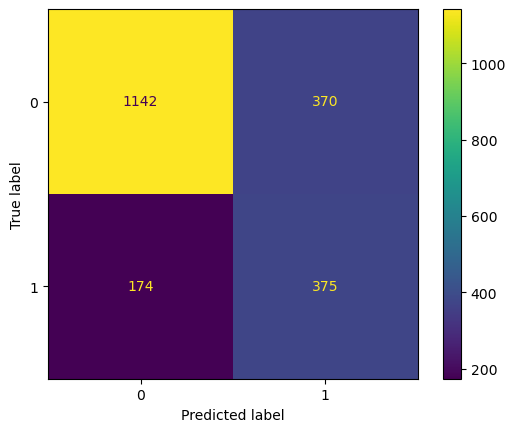

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
Hyperparameter Tuning
To improve model performance, tune hyperparameters using GridSearchCV or RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [scale_pos_weight]  # Use the calculated imbalance ratio
}

# Initialize the search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Perform the search
random_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {random_search.best_params_}")

# Use the best model
best_xgb = random_search.best_estimator_

c:\Users\bryan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1, 'scale_pos_weight': 2.751024123805189, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1}


Generating Risk scores.(Probability for CLAIM_FLAG=1)

In [ ]:

X_test['Risk_Score']= best_xgb.predict_proba(X_test)

In [ ]:
# combining the Risk_Score column to be part of the data DataFrame that includes the CLAIM_FLAG
data.loc[X_test.index, 'Risk_Score'] = X_test['Risk_Score']

In [ ]:
print(data.head())

          ID  KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME  HOME_VAL  TRAVTIME  \
0   63581743         0  60.0         0  11.0  67349.0       0.0        14   
1  132761049         0  43.0         0  11.0  91449.0  257252.0        22   
2  921317019         0  48.0         0  11.0  52881.0       0.0        26   
3  727598473         0  35.0         1  10.0  16039.0  124191.0         5   
4  450221861         0  51.0         0  14.0      0.0  306251.0        32   

   TIF  CLM_FREQ  ...  CLM_AMT_$960  CLM_AMT_$962  CLM_AMT_$966  CLM_AMT_$978  \
0   11         2  ...         False         False         False         False   
1    1         0  ...         False         False         False         False   
2    1         0  ...         False         False         False         False   
3    4         2  ...         False         False         False         False   
4    7         0  ...         False         False         False         False   

   CLM_AMT_$979  CLM_AMT_$980  CLM_AMT_$984  CLM_A

Visualizing the Risk scores

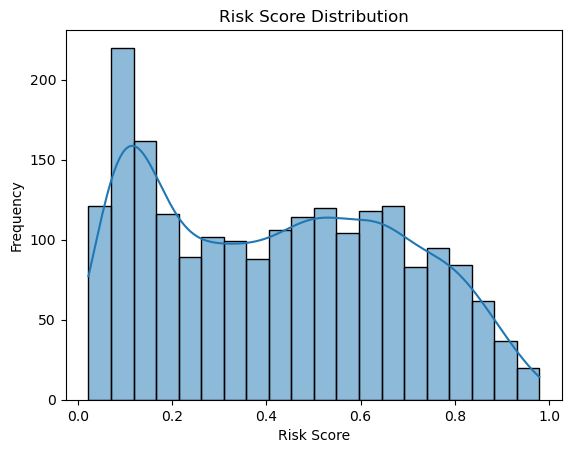

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X_test['Risk_Score'], bins=20, kde=True)
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

Saving the new dataset to csv

In [ ]:
X_test.to_csv('xgboost_risk_scores.csv', index=False)

In [ ]:
data['Risk_Score'] = risk_scores.values

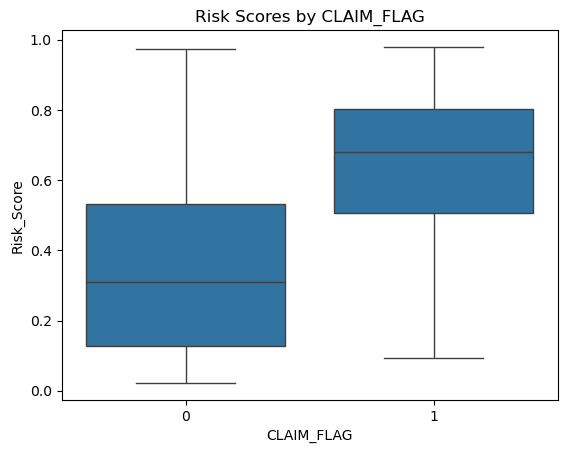

In [ ]:
import seaborn as sns
sns.boxplot(x='CLAIM_FLAG', y='Risk_Score', data=data)
plt.title('Risk Scores by CLAIM_FLAG')
plt.show()

to check how well the predicted probabilities (risk scores) align with actual probabilities of claims. I used the calibration curve

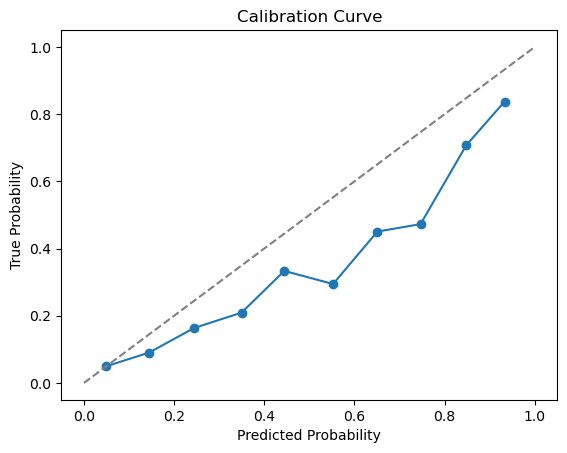

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Perfect calibration
plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

MODEL DEVELOPMENT   
1. Initial Approach with Random Forest
 Random Forest is an ensemble learning technique that is robust to overfitting, handles missing data, and captures non-linear relationships well. It was chosen as an initial model due to its interpretability and ability to work well with tabular data.
 Despite its strengths, Random Forest struggled with imbalanced data, where there were far fewer claims (minority class) compared to non-claims (majority class). The model predicted the majority class well but underperformed for the minority class (claims), as seen in metrics:
Precision for claims: 0.82
Recall for claims: 0.08
AUC-ROC score: 0.79

2. Improvement with XGBoost
XGBoost (Extreme Gradient Boosting) is a more advanced machine learning algorithm known for its efficiency and performance on complex datasets. It includes techniques like weighted learning to handle class imbalance better.
Results After Tuning:
Overall accuracy: 74%
Precision for claims: 50%
Recall for claims: 68%
AUC-ROC score: 0.81

Key takeaway: While the precision for claims decreased slightly, recall improved significantly, meaning the model became much better at identifying actual claims. This was a meaningful improvement, as identifying claims is critical for risk management.


Risk Scores
The model predicted probabilities (risk scores) for each policyholder, representing their likelihood of making a claim. Higher scores indicate higher risks. These scores were visualized and compared with the actual claim outcomes.
A calibration curve was created to evaluate how well the predicted probabilities matched the actual likelihood of claims.

Results:
The curve showed that the model’s predictions were generally well-aligned with reality, especially at higher probabilities.
Interpretation for the business: A well-calibrated model ensures that a policyholder with a predicted claim probability of 70% truly has a 70% chance of making a claim, enabling reliable decision-making.


BUSINESS IMPLICATIONS

1. Fair Pricing: Using the risk scores, the company can set premiums more accurately, ensuring fairness by charging higher-risk customers higher premiums while rewarding low-risk customers with discounts.

2. Proactive Risk Management: High-risk policyholders can be flagged for interventions, such as additional safety measures or targeted communication to mitigate potential claims.

3. Increased Profitability: By better predicting claims, the company can minimize losses and improve profitability.